<a href="https://colab.research.google.com/github/Miss-Dev/Aprendendo-Ciencia-de-dados-/blob/main/ProjetoIris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estudante: Samara H. Ramos


RGA: 20190571011


Disciplina: Tópicos em Sistemas de Informação

---

  **Projeto predição de dados de Íris**

---










In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#lendo o dataset
colunas = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv('iris.data', names=colunas)

In [ ]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
dataset.shape

(150, 5)

In [ ]:
#informações sobre os atributos do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#descrição estatística
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Adicionando tratativas de dados faltantes

In [ ]:
#Verificando soma de valores nulos
dataset.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64

In [ ]:
#Dados faltantes não encontrados acima
dataset.isnull().sum().sum()

0

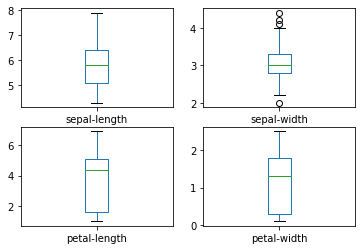

In [ ]:
#distribuição dos atributos
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

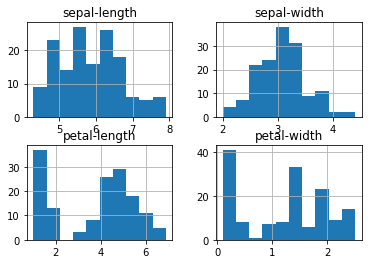

In [ ]:
dataset.hist()
plt.show()

In [ ]:
from sklearn import model_selection

In [ ]:
#dividindo o dataset para treino e teste
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
tamanho_teste = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=tamanho_teste, random_state=seed)

In [ ]:
#treinando modelo de árvore de decisão
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

In [ ]:
from sklearn import tree

[Text(133.92000000000002, 195.696, 'X[3] <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [43, 38, 39]'),
 Text(66.96000000000001, 152.208, 'gini = 0.0\nsamples = 43\nvalue = [43, 0, 0]'),
 Text(200.88000000000002, 152.208, 'X[3] <= 1.7\ngini = 0.5\nsamples = 77\nvalue = [0, 38, 39]'),
 Text(133.92000000000002, 108.72, 'X[2] <= 5.0\ngini = 0.095\nsamples = 40\nvalue = [0, 38, 2]'),
 Text(66.96000000000001, 65.232, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(200.88000000000002, 65.232, 'X[0] <= 6.05\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.84000000000003, 21.744, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 37\nvalue = [0, 0, 37]')]

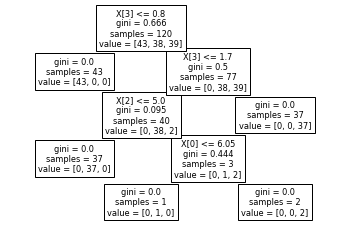

In [ ]:
#plotando a descrição da árvore
tree.plot_tree(clf)

In [ ]:
#predição do modelo
predictions = clf.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 10  2]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.91      0.83      0.87        12
 Iris-virginica       0.83      0.91      0.87        11

       accuracy                           0.90        30
      macro avg       0.91      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



In [ ]:
#adequando valores dos parâmetros da classe arvore de decisão
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, Y_train)

In [ ]:
#predição do modelo
predictions = clf.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 10  2]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.91      0.83      0.87        12
 Iris-virginica       0.83      0.91      0.87        11

       accuracy                           0.90        30
      macro avg       0.91      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



Foi possível aumentar a precisão do modelo, ajustando o tamanho da profundidade da árvore de decisão

In [ ]:
#testando novo modelo => random forest

from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(max_depth=5, random_state=0)

In [ ]:
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
#predição do modelo
predictions = clf.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8666666666666667
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30



In [ ]:
print(clf.predict([[0, 0, 0, 0]]))

['Iris-setosa']
